In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

#### Example 1

In [2]:
X, y = make_classification(n_samples=1000, n_features=4, random_state=0, shuffle=False)

In [3]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

The number of weak learners is controlled by the parameter n_estimators
By default, weak learners are decision stumps.

In [4]:
clf.fit(X, y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [5]:
clf.score(X, y)

0.987

In [6]:
clf.predict([[0, 0, 0, 0]]) 

array([1])

In [7]:
clf.feature_importances_

array([0.13, 0.4 , 0.24, 0.23])

#### Example 2

In [11]:
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
model = AdaBoostClassifier(n_estimators=100)         # By default, weak learners are decision stumps.
s = cross_val_score(model,X,y,cv=5)   # f1,f2,f3,f4,f5
s

In [ ]:
s.mean()

In [13]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
s = cross_val_score(model,X,y,cv=5)   # f1,f2,f3,f4,f5
s

In [18]:
s.mean()

0.9466666666666665

#### Example 3

In [23]:
X1, y1 = make_gaussian_quantiles(cov=2.    , n_samples=200, n_features=2 ,n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3,3), n_samples=300, n_features=2 ,n_classes=2, random_state=1, cov=1.5)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

In [24]:
model = AdaBoostClassifier( n_estimators=100 ,algorithm="SAMME" )

In [25]:
model.fit(X, y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

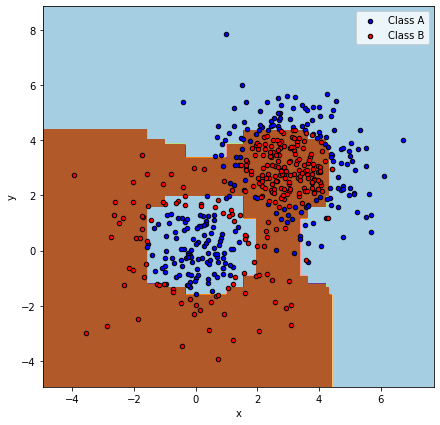

In [26]:
plt.figure(figsize=(7, 7))
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

for i, n, c in zip(range(2), "AB", "br"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, cmap=plt.cm.Paired, s=20, edgecolor='k',label="Class %s" % n)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y');